In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import os
cwd = os.getcwd()


# In[41]:


# The aim of this project is to explore the number and geographic distribution of Ukrainian refugees in Ireland since 2022. 
# I will use Python to create:
# 1. Dataframes with the number of Ukrainian refugees in a given area;
# 2. a geographic plot of the top 5 counties by number of refugees hosted.

# First I will import a CSO dataset on the number of Ukrainian refugees who have arrived in each Local Electoral Area in Ireland in 2022 in XLSX format:
ukraine_arrivals_county_xlsx  = pd.read_excel(r"C:\Users\andyb\OneDrive\Documents\Ukraine Arrivals 2022.xlsx", sheet_name = "No. of arrivals")
ua_df1 = pd.DataFrame(ukraine_arrivals_county_xlsx)
ua_df1.head()

# Note that the data in this table is cumulative; the figure in each LEA for each successive month includes the previous figures from previous months.

,Day,Local Electoral Area 2019,County,No. of people,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2022 May 23,"Adare-Rathkeale, Limerick",Limerick,127.0,NaN,NaN,NaN,NaN
1,2022 June 07,"Adare-Rathkeale, Limerick",Limerick,124.0,NaN,NaN,NaN,NaN
2,2022 June 20,"Adare-Rathkeale, Limerick",Limerick,130.0,NaN,NaN,NaN,NaN
3,2022 July 11,"Adare-Rathkeale, Limerick",Limerick,130.0,NaN,NaN,NaN,NaN
4,2022 August 09,"Adare-Rathkeale, Limerick",Limerick,128.0,NaN,NaN,NaN,NaN


In [44]:
# I will filter by December 12th to get the latest figure for each LEA
mask1 = ua_df1["Day"].str.contains("2022 December 12")
ua_df1[mask1].head()


,Day,Local Electoral Area 2019,County,No. of people,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
8,2022 December 12,"Adare-Rathkeale, Limerick",Limerick,170.0,NaN,NaN,NaN,NaN
17,2022 December 12,All Local Electoral Areas,NaN,64168.0,NaN,NaN,NaN,NaN
26,2022 December 12,"Ardee, Louth",Louth,199.0,NaN,NaN,NaN,NaN
35,2022 December 12,"Arklow, Wicklow",Wicklow,262.0,NaN,NaN,NaN,NaN
44,2022 December 12,"Artane-Whitehall, Dublin City",Dublin,293.0,NaN,NaN,NaN,NaN


In [45]:
# Next, I will import another sheet from the same XLSX file with the number of Ukrainian refugees in each LEA as a percentage of the population:
ukraine_arrivals_percentage_of_pop_xlsx  = pd.read_excel(r"C:\Users\andyb\OneDrive\Documents\Ukraine Arrivals 2022.xlsx", sheet_name = "Arrivals as % of Pop")
ua_df2 = pd.DataFrame(ukraine_arrivals_percentage_of_pop_xlsx)


In [46]:
# I will filter by December 12th to get the latest figure for each LEA
mask2 = ua_df2["Day"].str.contains("2022 December 12")
ua_df2[mask2].head()


,Day,Local Electoral Area 2019,County,Percentage (%) of Population
8,2022 December 12,"Adare-Rathkeale, Limerick",Limerick,0.599838
16,2022 December 12,All Local Electoral Areas,NaN,NaN
25,2022 December 12,"Ardee, Louth",Louth,0.737775
34,2022 December 12,"Arklow, Wicklow",Wicklow,0.939674
43,2022 December 12,"Artane-Whitehall, Dublin City",Dublin,0.565528


In [47]:
# I will now merge these tables 
ua_arrivals_overview = pd.merge(ua_df1, ua_df2)
ua_arrivals_overview.dropna()
ua_arrivals_overview.loc[(ua_arrivals_overview["County"] == "Kerry") & (ua_arrivals_overview["Day"] == "2022 December 12")]

,Day,Local Electoral Area 2019,County,No. of people,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Percentage (%) of Population
421,2022 December 12,"Castleisland, Kerry",Kerry,23.0,NaN,NaN,NaN,NaN,0.128262
529,2022 December 12,"Corca Dhuibhne, Kerry",Kerry,467.0,NaN,NaN,NaN,NaN,3.142876
860,2022 December 12,"Killarney, Kerry",Kerry,2019.0,NaN,NaN,NaN,NaN,6.532289
986,2022 December 12,"Listowel, Kerry",Kerry,583.0,NaN,NaN,NaN,NaN,1.998560
1400,2022 December 12,"Tralee, Kerry",Kerry,1651.0,NaN,NaN,NaN,NaN,4.675464


In [48]:
mask3 = ua_arrivals_overview["Day"].str.contains("2022 December 12")
ua_arrivals_overview[mask3].loc[:]

,Day,Local Electoral Area 2019,County,No. of people,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Percentage (%) of Population
8,2022 December 12,"Adare-Rathkeale, Limerick",Limerick,170.0,NaN,NaN,NaN,NaN,0.599838
16,2022 December 12,All Local Electoral Areas,NaN,64168.0,NaN,NaN,NaN,NaN,NaN
25,2022 December 12,"Ardee, Louth",Louth,199.0,NaN,NaN,NaN,NaN,0.737775
34,2022 December 12,"Arklow, Wicklow",Wicklow,262.0,NaN,NaN,NaN,NaN,0.939674
43,2022 December 12,"Artane-Whitehall, Dublin City",Dublin,293.0,NaN,NaN,NaN,NaN,0.565528
...,...,...,...,...,...,...,...,...,...
1454,2022 December 12,"Waterford City East, Waterford",Waterford,142.0,NaN,NaN,NaN,NaN,0.581776
1463,2022 December 12,"Waterford City South, Waterford",Waterford,254.0,NaN,NaN,NaN,NaN,0.974786
1472,2022 December 12,"Westport, Mayo",Mayo,971.0,NaN,NaN,NaN,NaN,4.912973
1481,2022 December 12,"Wexford, Wexford",Wexford,278.0,NaN,NaN,NaN,NaN,0.878912


In [49]:
grouped_counties = ua_arrivals_overview[mask3].groupby(["Day", "County"]).sum("No. of people")
ua_arrivals_overview_grouped = pd.DataFrame(grouped_counties)
ua_arrivals_overview_grouped.loc[:]

No. of people  Unnamed: 4  Unnamed: 5  \
Day              County                                              
2022 December 12  Roscommon          707.0         0.0         0.0   
                 Carlow              872.0         0.0         0.0   
                 Cavan              1258.0         0.0         0.0   
                 Clare              4008.0         0.0         0.0   
                 Cork               6135.0         0.0         0.0   
                 Donegal            4789.0         0.0         0.0   
                 Dublin            11349.0         0.0         0.0   
                 Galway             4025.0         0.0         0.0   
                 Kerry              4743.0         0.0         0.0   
                 Kildare            1063.0         0.0         0.0   
                 Kilkenny           1255.0         0.0         0.0   
                 Laois               789.0         0.0         0.0   
                 Leitrim            1259.0         0.0         0.0   
                 Limerick           2301.0         0.0         0.0   
                 Longford            429.0         0.0         0.0   
                 Louth              1640.0         0.0         0.0   
                 Mayo               3169.0         0.0         0.0   
                 Meath              1549.0         0.0         0.0   
                 Monaghan            418.0         0.0         0.0   
                 Offaly              619.0         0.0         0.0   
                 Sligo              1178.0         0.0         0.0   
                 Tipperary          1185.0         0.0         0.0   
                 Waterford          1654.0         0.0         0.0   
                 Westmeath          1464.0         0.0         0.0   
                 Wexford            2329.0         0.0         0.0   
                 Wicklow            1945.0         0.0         0.0   

                             Unnamed: 6  Unnamed: 7  \
Day              County                               
2022 December 12  Roscommon         0.0         0.0   
                 Carlow             0.0         0.0   
                 Cavan              0.0         0.0   
                 Clare              0.0         0.0   
                 Cork               0.0         0.0   
                 Donegal            0.0         0.0   
                 Dublin             0.0         0.0   
                 Galway             0.0         0.0   
                 Kerry              0.0         0.0   
                 Kildare            0.0         0.0   
                 Kilkenny           0.0         0.0   
                 Laois              0.0         0.0   
                 Leitrim            0.0         0.0   
                 Limerick           0.0         0.0   
                 Longford           0.0         0.0   
                 Louth              0.0         0.0   
                 Mayo               0.0         0.0   
                 Meath              0.0         0.0   
                 Monaghan           0.0         0.0   
                 Offaly             0.0         0.0   
                 Sligo              0.0         0.0   
                 Tipperary          0.0         0.0   
                 Waterford          0.0         0.0   
                 Westmeath          0.0         0.0   
                 Wexford            0.0         0.0   
                 Wicklow            0.0         0.0   

                             Percentage (%) of Population  
Day              County                                    
2022 December 12  Roscommon                      2.908529  
                 Carlow                          3.675898  
                 Cavan                           4.612670  
                 Clare                          17.423908  
                 Cork                           16.091175  
                 Donegal                        20.771018  
                 Dublin                        

In [50]:
# I'll drop those columns in the middle; I'm not sure how they appeared, but they're adding no value:
ua_arrivals_overview_grouped.columns.get_level_values(0)

Index(['No. of people', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Percentage (%) of Population'],
      dtype='object')

In [51]:
ua_arrivals_overview_grouped.columns

Index(['No. of people', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Percentage (%) of Population'],
      dtype='object')

In [52]:
ua_arrivals_overview_grouped.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], inplace=True, errors='ignore')

In [53]:
ua_arrivals_overview_grouped.loc[:]

No. of people  Percentage (%) of Population
Day              County                                                 
2022 December 12  Roscommon          707.0                      2.908529
                 Carlow              872.0                      3.675898
                 Cavan              1258.0                      4.612670
                 Clare              4008.0                     17.423908
                 Cork               6135.0                     16.091175
                 Donegal            4789.0                     20.771018
                 Dublin            11349.0                     23.515696
                 Galway             4025.0                     15.485376
                 Kerry              4743.0                     16.477453
                 Kildare            1063.0                      3.421099
                 Kilkenny           1255.0                      4.460391
                 Laois               789.0                      2.540995
                 Leitrim            1259.0                     10.962371
                 Limerick           2301.0                      6.532603
                 Longford            429.0                      2.770796
                 Louth              1640.0                      5.752680
                 Mayo               3169.0                     13.903679
                 Meath              1549.0                      4.319264
                 Monaghan            418.0                      1.979288
                 Offaly              619.0                      2.112969
                 Sligo              1178.0                      5.360884
                 Tipperary          1185.0                      5.293521
                 Waterford          1654.0                      7.283860
                 Westmeath          1464.0                      5.983177
                 Wexford            2329.0                      8.611555
                 Wicklow            1945.0                      8.463746

In [54]:
# The Kenmare entry for Kerry appears to be missing, so that will need to be appended. A bigger problem is that the percentages have been summed, giving incorrect figures. 
# The percentage figures are for each LEA rather than the county as a whole and so cannot be summed.
# Looking at the data now, the percentage figures are not as useful as I thought they would be.
# Therefore, I'm going to drop the percentage column from this DataFrame:
ua_arrivals_overview_people_only = ua_arrivals_overview_grouped.drop(columns = "Percentage (%) of Population")
ua_arrivals_overview_people_only.loc[:]

No. of people
Day              County                   
2022 December 12  Roscommon          707.0
                 Carlow              872.0
                 Cavan              1258.0
                 Clare              4008.0
                 Cork               6135.0
                 Donegal            4789.0
                 Dublin            11349.0
                 Galway             4025.0
                 Kerry              4743.0
                 Kildare            1063.0
                 Kilkenny           1255.0
                 Laois               789.0
                 Leitrim            1259.0
                 Limerick           2301.0
                 Longford            429.0
                 Louth              1640.0
                 Mayo               3169.0
                 Meath              1549.0
                 Monaghan            418.0
                 Offaly              619.0
                 Sligo              1178.0
                 Tipperary          1185.0
                 Waterford          1654.0
                 Westmeath          1464.0
                 Wexford            2329.0
                 Wicklow            1945.0

In [55]:
# Now to append the value for Kerry by replacing 4743 with 6493 (4743 + 1750 which is the missing total no. of arrivals in Kenmare):
ua_arrivals_overview_people_appended = ua_arrivals_overview_people_only.replace(to_replace = 4743, value = 6493)
ua_arrivals_overview_people_appended.loc[:]

No. of people
Day              County                   
2022 December 12  Roscommon          707.0
                 Carlow              872.0
                 Cavan              1258.0
                 Clare              4008.0
                 Cork               6135.0
                 Donegal            4789.0
                 Dublin            11349.0
                 Galway             4025.0
                 Kerry              6493.0
                 Kildare            1063.0
                 Kilkenny           1255.0
                 Laois               789.0
                 Leitrim            1259.0
                 Limerick           2301.0
                 Longford            429.0
                 Louth              1640.0
                 Mayo               3169.0
                 Meath              1549.0
                 Monaghan            418.0
                 Offaly              619.0
                 Sligo              1178.0
                 Tipperary          1185.0
                 Waterford          1654.0
                 Westmeath          1464.0
                 Wexford            2329.0
                 Wicklow            1945.0

In [56]:
# Now I'm going to create a chart for the top 5 counties by number of Ukrainians living there (Dublin, Kerry, Cork, Donegal, and Galway). 
# First, I need to create a dictionary for each county with the number of Ukrainians living there in each month.
# For this use case, I feel that it's qucker to pull the numbers from Excel, and I also want to demonstrate converting a dictionary into a chart;
# Therefore, I will simpply copy the numbers into my dictionaries:
dublin_ukrainians_by_month = {"May" : 5909, "June": 7479, "July": 9310, "August": 9644, "September": 10469, "October" : 10469, "November": 11108, "December": 11349}


In [57]:
# I can now use Dublin as a template to quickly create the other dictionaries:
kerry_ukrainians_by_month = {"May" : 2248, "June": 2796, "July": 3027, "August": 3448, "September": 4717, "October" : 4717, "November": 5796, "December": 6493}
cork_ukrainians_by_month = {"May" : 2959, "June": 3828, "July": 4385, "August": 4682, "September": 5054, "October" : 5054, "November": 5475, "December": 6135}
donegal_ukrainians_by_month = {"May" : 1236, "June": 1683, "July": 1884, "August": 2298, "September": 3740, "October" : 3740, "November": 4441, "December": 4789}
galway_ukrainians_by_month = {"May" : 1585, "June": 2358, "July": 2790, "August": 3206, "September": 3291, "October" : 3291, "November": 3611, "December": 4025}

In [58]:
# Now to create a DataFrame combining all these dictionaries:
D_UA_df = pd.DataFrame( data = dublin_ukrainians_by_month, index = ["Dublin"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [59]:
KY_UA_df = pd.DataFrame( data = kerry_ukrainians_by_month, index = ["Kerry"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [60]:
C_UA_df = pd.DataFrame( data = cork_ukrainians_by_month, index = ["Cork"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [61]:
DL_UA_df = pd.DataFrame( data = donegal_ukrainians_by_month, index = ["Donegal"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [62]:
G_UA_df = pd.DataFrame( data = galway_ukrainians_by_month, index = ["Galway"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [63]:
top_5_counties = [D_UA_df, KY_UA_df, C_UA_df, DL_UA_df, G_UA_df]

In [64]:
top_5_df = pd.concat(top_5_counties)

In [65]:
top_5_df.loc[:]

,May,June,July,August,September,October,November,December
Dublin,5909,7479,9310,9644,10469,10469,11108,11349
Kerry,2248,2796,3027,3448,4717,4717,5796,6493
Cork,2959,3828,4385,4682,5054,5054,5475,6135
Donegal,1236,1683,1884,2298,3740,3740,4441,4789
Galway,1585,2358,2790,3206,3291,3291,3611,4025


In [66]:
top_5_df.index.name = "County"
top_5_df.loc[:]

,May,June,July,August,September,October,November,December
County,,,,,,,,
Dublin,5909,7479,9310,9644,10469,10469,11108,11349
Kerry,2248,2796,3027,3448,4717,4717,5796,6493
Cork,2959,3828,4385,4682,5054,5054,5475,6135
Donegal,1236,1683,1884,2298,3740,3740,4441,4789
Galway,1585,2358,2790,3206,3291,3291,3611,4025


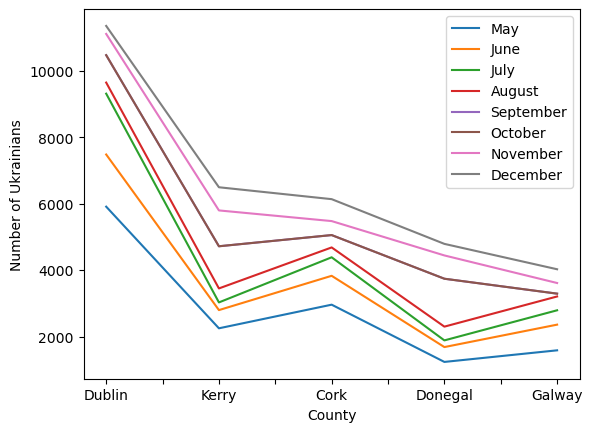

In [67]:
# I'm going to use Matplotlib to create a line plot of the data now:
fig, ax = plt.subplots()
top_5_df.plot(ax=ax)
ax.set_xlabel("County")
ax.set_ylabel("Number of Ukrainians")
plt.show()

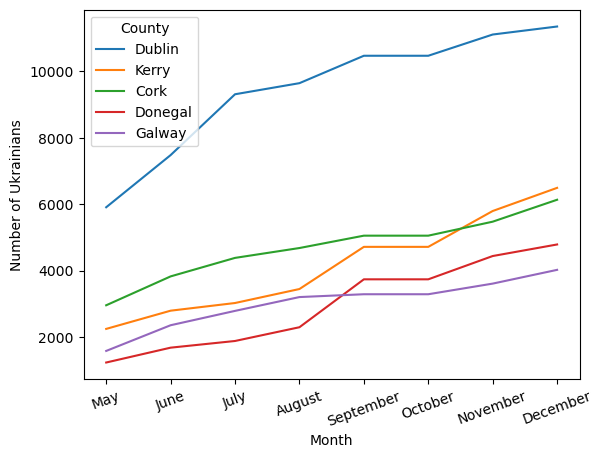

In [68]:
# This plot is not easy to understand in this format, so I'm going to transpose it to make it clearer:
top_5_df_transposed = top_5_df.T
fig, ax = plt.subplots()
top_5_df_transposed.plot(ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel("Number of Ukrainians")
ax.set_xticks(range(len(top_5_df_transposed.index)))
ax.set_xticklabels(top_5_df_transposed.index)
ax.set_xticklabels(top_5_df_transposed.index, rotation=20, fontsize=10)
plt.show()

In [69]:
# Much better! This plot shows the clear difference between the number of Ukrainian refugees living in Dublin versus the next highest counties. 
# It also shows a more or less steady upward trend in numbers in all counties from May to December.

In [70]:
# It would be interesting to plot the final number for 2022 (i.e. the December number) on a map:
counties = {
    'Dublin': [53.3498, -6.2603],
    'Donegal': [54.65, -8.11],
    'Kerry': [52.14, -9.52],
    'Cork': [51.89, -8.47],
    'Galway': [53.27, -9.05]
}

m = folium.Map(location=[53.1424, -7.6921], zoom_start=6)
for i, row in top_5_df.iterrows():
    folium.CircleMarker(location=counties[row.name],
                        radius=row['December']*0.01,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(m)
m

In [71]:
# That was a pain, but the result looks cool; let's vary the colour a bit:

color_map = {'Dublin': 'blue', 'Cork': 'red', 'Kerry': 'green', 'Donegal': 'yellow', 'Galway': 'maroon'}

def color_by_county(county):
    return color_map[county]

map = folium.Map(location=[53.1424, -7.6921], zoom_start=7)
for county, coordinates in counties.items():
    folium.CircleMarker(location=coordinates,
                        radius=top_5_df.loc[county, "December"]*0.007,
                        color=color_by_county(county),
                        fill=True,
                        fill_color=color_by_county(county)).add_to(map)
map


In [72]:
# The map plot further helps visualise the geographic distribution of refugees hosted among the top 5 counties in 2022.

# It's interesting that Kerry overtook Cork in 2nd place between October and November; why is this?
# I suspect it could be due to the availability of holiday homes, as Kerry has a large number of these.
# Holiday homes are typically vacant in the winter months and thus could potentially be used for temporary refugee accommodation, so this could be an explanation.
# To investigate, I will create a DataFrame with these 5 counties and the number of vacant holiday homes in each from May-December 2022.
# I will then create a plot with this data, similar to above, and see what I find.
# Of course, correlation does not equal causation, so I will have to corroborate any such finding with other sources.

In [73]:
# First I will import another CSV file downloaded from the CSO website with data on the number of unoccupied holiday homes in Ireland in 2022:
holiday_homes_xlsx  = pd.read_excel(r"C:\Users\andyb\OneDrive\Documents\Holiday Homes and Vacant Dwelling Data.xlsx", sheet_name = "Data Cleaned")
holiday_homes_df1 = pd.DataFrame(holiday_homes_xlsx)
holiday_homes_df1.loc[:]

,Administrative County,Type,Number
0,Ireland,Unoccupied Holiday Homes,66135
1,Dublin City,Unoccupied Holiday Homes,753
2,Cork County,Unoccupied Holiday Homes,7089
3,Donegal,Unoccupied Holiday Homes,12377
4,Mayo,Unoccupied Holiday Homes,5911
...,...,...,...
59,Monaghan,Vacant Dwellings,2873
60,Offaly,Vacant Dwellings,2663
61,Laois,Vacant Dwellings,2650
62,Longford,Vacant Dwellings,2338


In [74]:
# Time to clean this DataFrame.
# I'll start by removing the Vacant Dwelling rows:
holiday_homes_df2 = holiday_homes_df1[holiday_homes_df1['Type'] != 'Vacant Dwellings']
holiday_homes_df2.loc[:]

,Administrative County,Type,Number
0,Ireland,Unoccupied Holiday Homes,66135
1,Dublin City,Unoccupied Holiday Homes,753
2,Cork County,Unoccupied Holiday Homes,7089
3,Donegal,Unoccupied Holiday Homes,12377
4,Mayo,Unoccupied Holiday Homes,5911
5,Galway County,Unoccupied Holiday Homes,4252
6,Kerry,Unoccupied Holiday Homes,8716
7,Limerick City and County,Unoccupied Holiday Homes,642
8,Tipperary,Unoccupied Holiday Homes,1095
9,Wexford,Unoccupied Holiday Homes,5977


In [75]:
# Next, I'll remove the other counties so that we're only left with the administrative counties that comprise Dublin, Cork, Kerry, Donegal, and Galway:
county_list = county_list = ['Cork County', 'Donegal', 'Galway County', 'Kerry', 'Dún Laoghaire-Rathdown', 'Cork City', 'Fingal', 'South Dublin', 'Galway City']
holiday_homes_filtered_df3 = holiday_homes_df2.loc[holiday_homes_df2['Administrative County'].isin(county_list)]
holiday_homes_filtered_df3.loc[:]

,Administrative County,Type,Number
2,Cork County,Unoccupied Holiday Homes,7089
3,Donegal,Unoccupied Holiday Homes,12377
5,Galway County,Unoccupied Holiday Homes,4252
6,Kerry,Unoccupied Holiday Homes,8716
11,Dún Laoghaire-Rathdown,Unoccupied Holiday Homes,442
12,Cork City,Unoccupied Holiday Homes,191
13,Fingal,Unoccupied Holiday Homes,434
20,South Dublin,Unoccupied Holiday Homes,81
25,Galway City,Unoccupied Holiday Homes,594


In [76]:
# Dublin City, Donegal, and Galway County are missing from the dataframe, so I will append them manually:
missing_counties = {"Dublin City": 753, "Donegal": 12377, "Galway County": 4252}
missing_counties_df = pd.DataFrame({'Administrative County': ['Dublin City', 'Donegal', 'Galway County'], 'Type': ['Unoccupied Holiday Homes', 'Unoccupied Holiday Homes', 'Unoccupied Holiday Homes'], 'Number': [753, 12377, 4252]})
missing_counties_df = missing_counties_df.reset_index(drop=True)
holiday_homes_df4 = pd.concat([holiday_homes_filtered_df3, missing_counties_df], ignore_index=True)

# I'm dropping the "Type" column because it's irrelevant and starting to annoy me:
holiday_homes_df4 = holiday_homes_df4.drop(columns=['Type'])
holiday_homes_df4.loc[:]

,Administrative County,Number
0,Cork County,7089
1,Donegal,12377
2,Galway County,4252
3,Kerry,8716
4,Dún Laoghaire-Rathdown,442
5,Cork City,191
6,Fingal,434
7,South Dublin,81
8,Galway City,594
9,Dublin City,753


In [77]:
# Now we need to add the values for city and county:
holiday_homes_df5 = holiday_homes_df4.groupby('Administrative County', as_index=False)['Number'].sum()
dublin_mask = holiday_homes_df5['Administrative County'].isin(['Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'South Dublin'])
selected_rows = holiday_homes_df5[dublin_mask]
dublin_row = pd.DataFrame({'Administrative County': ['Dublin'], 'Number': [selected_rows['Number'].sum()]})
holiday_homes_df5 = holiday_homes_df5.drop(holiday_homes_df5[dublin_mask].index)
holiday_homes_df5 = pd.concat([holiday_homes_df5, dublin_row])
holiday_homes_df5.loc[:]


,Administrative County,Number
0,Cork City,191
1,Cork County,7089
2,Donegal,24754
6,Galway City,594
7,Galway County,8504
8,Kerry,8716
0,Dublin,1710


In [78]:
# The Donegal entry appears to have been summed with itself; I will correct this later.
# I will continue by combining the Cork and Galway city and county figures:
holiday_homes_df6 = holiday_homes_df5.groupby('Administrative County', as_index=False)['Number'].sum()
cork_mask = holiday_homes_df6['Administrative County'].isin(['Cork City', 'Cork County'])
selected_rows = holiday_homes_df6[cork_mask]
cork_row = pd.DataFrame({'Administrative County': ['Cork'], 'Number': [selected_rows['Number'].sum()]})
holiday_homes_df6 = holiday_homes_df6.drop(holiday_homes_df6[cork_mask].index)
holiday_homes_df6 = pd.concat([holiday_homes_df6, cork_row])
holiday_homes_df6.loc[:]


,Administrative County,Number
2,Donegal,24754
3,Dublin,1710
4,Galway City,594
5,Galway County,8504
6,Kerry,8716
0,Cork,7280


In [79]:
holiday_homes_df7 = holiday_homes_df5.groupby('Administrative County', as_index=False)['Number'].sum()
galway_mask = holiday_homes_df7['Administrative County'].isin(['Galway City', 'Galway County'])
selected_rows = holiday_homes_df7[galway_mask]
galway_row = pd.DataFrame({'Administrative County': ['Galway'], 'Number': [selected_rows['Number'].sum()]})
holiday_homes_df7 = holiday_homes_df6.drop(holiday_homes_df7[galway_mask].index)
holiday_homes_df7 = pd.concat([holiday_homes_df7, galway_row])
holiday_homes_df7.loc[:]

,Administrative County,Number
2,Donegal,24754
3,Dublin,1710
6,Kerry,8716
0,Cork,7280
0,Galway,9098


In [80]:
# I just need to amend the value for Donegal:
holiday_homes_df7.loc[holiday_homes_df7['Number'] == 24754, 'Number'] = 12377
holiday_homes_df7.loc[:]

,Administrative County,Number
2,Donegal,12377
3,Dublin,1710
6,Kerry,8716
0,Cork,7280
0,Galway,9098


<AxesSubplot:xlabel='Administrative County', ylabel='Number'>

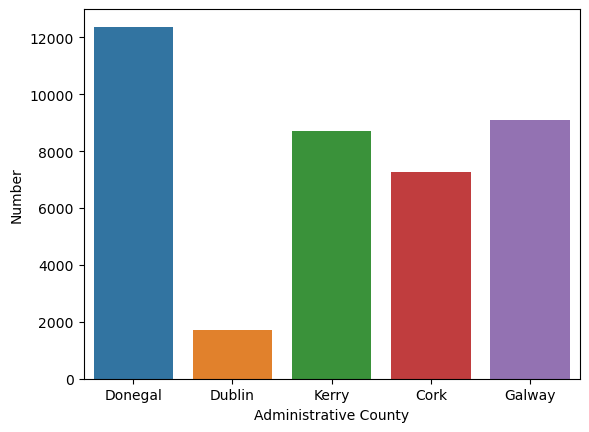

In [81]:
# Now, a quick bar plot will help visualise this data:
sns.barplot(x='Administrative County', y='Number', data=holiday_homes_df7)

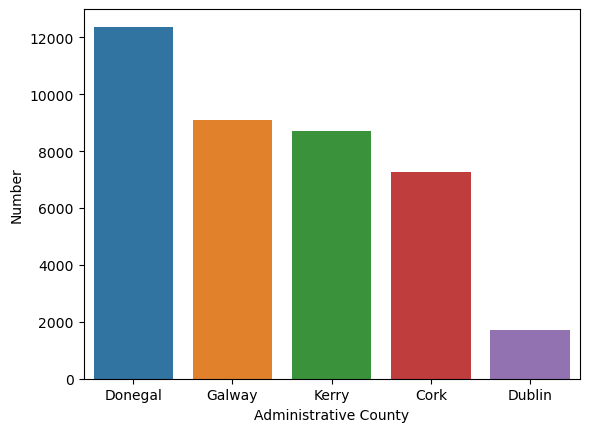

In [82]:
# I want to reorder the bars from largest to smallest to be more aesthetically pleasing:
holiday_homes_df7_sorted = holiday_homes_df7.sort_values(by='Number', ascending=False)
sns.barplot(x='Administrative County', y='Number', data=holiday_homes_df7_sorted)
plt.show()

In [41]:
# Perfect! Interesting to see that Donegal actually had the most number of unoccupied holiday homes in 2022. 
# This makes sense, since Donegal is a popular holiday destination in the summer but not as desirable for year-round residency.
# This is due to the unforgiving climate in winter, geographic isolation, underdeveloped infrastructure, and lack of economic opportunities.
# Based on these factors, one wonders if it is suitable long-term to accommodate refugees there.

# Back to the original question behind this data; Kerry did indeed have more unoccupied holiday homes than Cork in 2022.
# Kerry is another popular summer destination that's less desirable year-round for similar reasons to Donegal.
# Of course, this does not mean that this is the reason behind the larger number of refugees hosted in Kerry.
# I couldn't find another source to corroborate with, so the question of whether or not holiday homes are a deciding factor in the larger number of refugees hosted in Kerry vs Cork is is inconclusive